In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from processing_results import *

# Analyzing results Parameter Sweep with steps = 6

### All the metrics obtained
In the following dictionary one can find the strings that identify all the metrics that have been obtained from the simulations. Some of them are quite clear in their name. Others are commented with the objective of giving a bit more insight about them.

In [ ]:
dict_metrics = {'mean_FR_e': 5, 'mean_FR_i': 23, 'std_FR_e': 6, 'std_FR_i': 24,
                # Mean of FC and PLI matrices for both FRs
                'mean_FC_e': 7, 'mean_FC_i': 25, 'mean_PLI_e': 8, 'mean_PLI_i': 26,
                # Mean duration of up and down states
                'mean_up_e': 9, 'mean_up_i': 27, 'mean_down_e': 10, 'mean_down_i': 28,
                # all time max and minimum FR over all the regions
                'max_FR_e': 11, 'max_FR_i': 29, 
                # Peaks of PSDs. We obtain the frequency (fmax) at which the peak appears and 
                # its amplitude/power (pmax)
                # The peak has been calculted with two methods: peak with highest amplitude (amp)
                # and peak with highest prominence (prom)
                'fmax_amp_e': 12, 'pmax_amp_e': 13, 'fmax_amp_i': 30, 'pmax_amp_i': 31, 
                'fmax_prom_e': 14, 'pmax_prom_e': 15, 'fmax_prom_i': 32, 'pmax_prom_i': 33, 
                # The PSD has also been fitted to a power law b/f^a. We have obtained the slope a and
                # the score of the fitting.
                'slope_PSD_e': 16, 'score_PSD_e': 17, 'slope_PSD_i': 34, 'score_PSD_i': 35, 
                # frequencies have been divided into 5 typical bands: 'delta': (0.5, 4)Hz, 
                # 'theta': (4, 8)Hz,  'alpha': (8, 12)Hz, 'beta': (12, 30) Hz, 'gamma': (30, 100) Hz
                # and the relative power in each band has been obtained by numerical integration
                'delta_rel_p_e': 18, 'theta_rel_p_e': 19, 'alpha_rel_p_e': 20, 'beta_rel_p_e': 21, 
                'gamma_rel_p_e': 22, 'delta_rel_p_i': 36,'theta_rel_p_i': 37, 'alpha_rel_p_i': 38,
                'beta_rel_p_i': 39, 'gamma_rel_p_i': 40,
                # Finally, scoring on how close the spontaneous dynamics are to the expected dynamics
                # of the DMN has been performed in two ways.
                # 1. zscore: take PCC as seed, obtain correlations with all other regions (zscores),
                # take the 10 most correlated, count how many of the 10 regions belong to DMN
                # 1. frmean: obtain mean FR over time of each region, take the 10 with highest
                # mean FR, count how many of the 10 regions belong to DMN.
                'ratio_frmean_dmn_exc': 41, 'ratio_zscore_dmn_exc': 42, 'ratio_frmean_dmn_inh': 43,
                'ratio_zscore_dmn_inh': 44, 
                # To be finished, trying to count how many AI or UD nodes are in the 68 regions
                'ratio_AI_exc': 45}

### How to obtain plots of metric values when sweeping two parameters
The way to do this is to fix three parameters to a certain value. We can say what approximate value we want to fix it to and the algorithm will find the closest parameter value in the parameter sweep.
We declare the other two parameters that will be used for the sweep, a list of the metrics that we want to obtain and how many values/parameter have been explored in the parameter sweep (steps).
For instance, we want to see how $b$ and $T$ change when we fix inter-region coupling ($a$) close to 0.4, $E_{Le}$ close to -63mV and $E_{Li}$ close to -65mV.

By changing the metrics list (with the strings in the previous cell) one can select what metrics are shown.

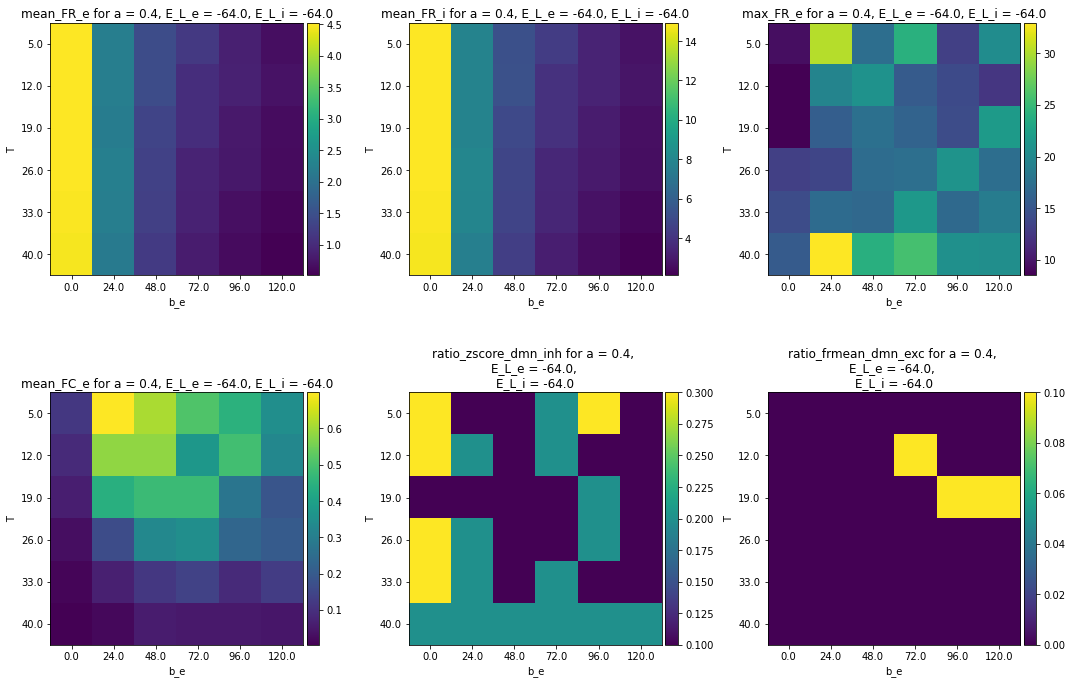

In [5]:
batches_folder = './results_batches/'
fixed_params = {'a': 0.4, 'E_L_e': -63, 'E_L_i': -65}
params_sweep = ('b_e', 'T')

steps = 6
metrics = ['mean_FR_e', 'mean_FR_i', 'max_FR_e', 'mean_FC_e', 
           'ratio_zscore_dmn_inh', 'ratio_frmean_dmn_exc']
fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
plt.show()

### Look for sets of parameters that result in the maximum value of a certain metric
It might happen that we want to find the sets of parameters that result in obtaining the highest values of metrics. For instance, let's see which sets of parameters get us the higher number of DMN regions in the top 10 regions with highest mean FR. 

In [6]:
max_value_metric, pars_where_max, idxes = params_of_max_metric("ratio_frmean_dmn_inh", 
                                                        batches_folder, 6, verbose=True)

Max ratio_frmean_dmn_inh = 0.4
Sets of values for maximum ratio_frmean_dmn_inh
a= 0.5, b_e= 0.0, E_L_i= -68.0, E_L_e= -64.0, T= 40.0, 
a= 0.5, b_e= 120.0, E_L_i= -76.0, E_L_e= -60.0, T= 40.0, 


### Do all combinations of sweeps to check the parameter sweep went well

In [7]:
import itertools
execute = False
fixed_params = {'a': 0.3, 'E_L_e': -80, 'E_L_i': -80}
params_sweep = ('b_e', 'T')

parameters = ['a', 'b_e', 'E_L_i', 'E_L_e', 'T']

if execute:
    for params_sweep in itertools.combinations(parameters, 2):
        fixed_list = parameters.copy()
        for param in params_sweep:
            fixed_list.remove(param)
        fixed_params = {}
        for fixed in fixed_list:
            if fixed == 'a':
                fixed_params[fixed] = 0.5*np.random.rand()
            elif fixed == 'b_e':
                fixed_params[fixed] = 120 * np.random.rand()
            elif fixed == 'E_L_i':
                fixed_params[fixed] = -60 - 20 * np.random.rand()
            elif fixed == 'E_L_e':
                fixed_params[fixed] = -60 - 20 * np.random.rand()
            elif fixed == 'T':
                fixed_params[fixed] = 40*np.random.rand()
        print(params_sweep)
        print(fixed_params)
        steps = 6
        metrics = ['mean_FR_e', 'mean_FR_i', 'max_FR_e', 'mean_FC_e', 
                   'ratio_zscore_dmn_inh', 'ratio_frmean_dmn_exc']
        fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
        plt.show()